# Loan Approval Prediction

## Packages

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests
from scipy.stats import chi2_contingency

# Auxiliary
import os

os.chdir(os.path.join(os.getcwd(), "data"))

## Exploratory Analysis

### Import and initial validations

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df.isnull().mean()

id                            0.0
person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
loan_status                   0.0
dtype: float64

There are no missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

All the data types seems correct

In [5]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


### Numeric variables analysis 

#### Distribuition based on Loan Status

In [6]:
def numerical_analysis(variable: str):

    # Metrics based on loan status
    display(df.groupby("loan_status")[variable].describe())

    fig, axes = plt.subplots(2, sharex=True)
    fig.set_figheight(5)
    fig.set_figwidth(10)

    # Histogram
    sns.histplot(x=variable, data=df, ax=axes[0], hue="loan_status", kde=True)
    axes[0].set_title(f"Histogram and Box-plot for {variable}")

    # Box-plot
    sns.boxplot(x=variable, data=df, ax=axes[1], hue="loan_status")

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50295.0,27.553634,5.980022,20.0,23.0,26.0,30.0,123.0
1,8350.0,27.534132,6.344539,20.0,23.0,26.0,30.0,80.0


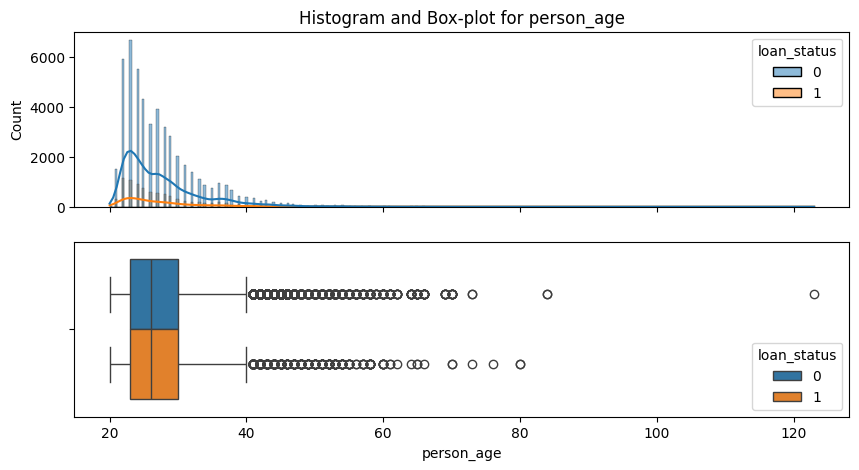

In [7]:
numerical_analysis("person_age")

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50295.0,66672.867720,39314.378848,4200.0,45000.0,60000.0,80000.0,1900000.0
1,8350.0,48224.661796,22435.665380,9600.0,32000.0,44000.0,59000.0,397800.0


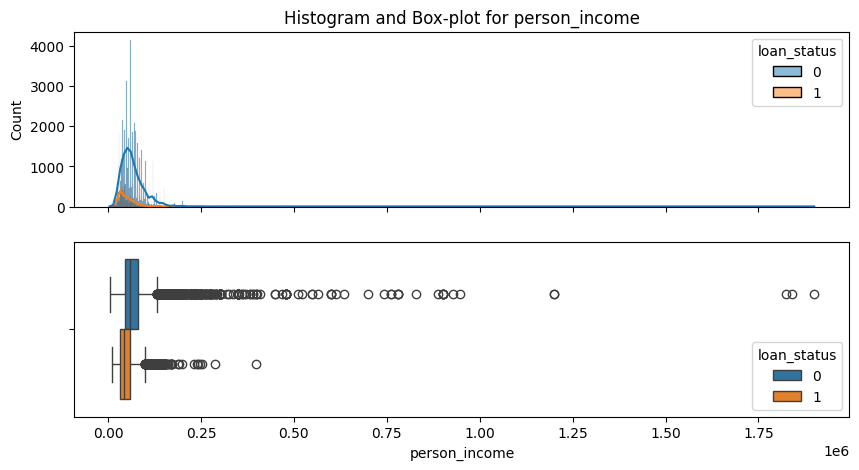

In [8]:
numerical_analysis("person_income")

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50295.0,4.863048,3.948375,0.0,2.0,4.0,7.0,123.0
1,8350.0,3.725030,3.887733,0.0,1.0,3.0,6.0,123.0


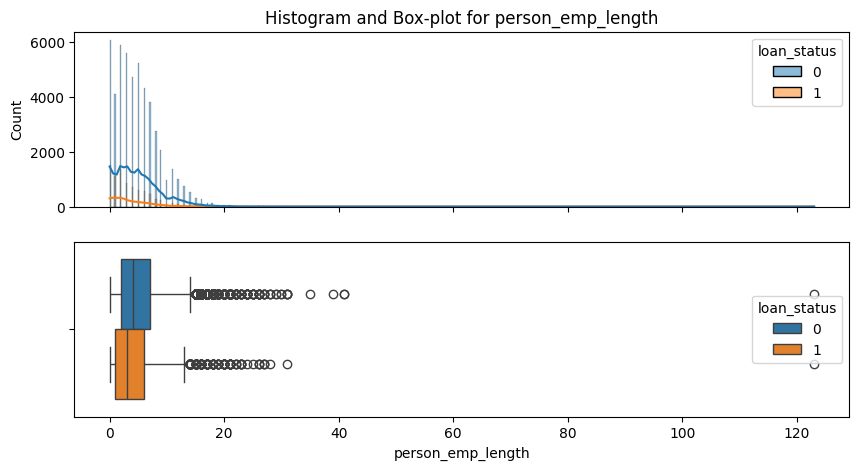

In [9]:
numerical_analysis("person_emp_length")

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50295.0,8888.883229,5328.359771,500.0,5000.0,8000.0,12000.0,35000.0
1,8350.0,11197.271856,6468.214784,1000.0,6000.0,10000.0,15000.0,35000.0


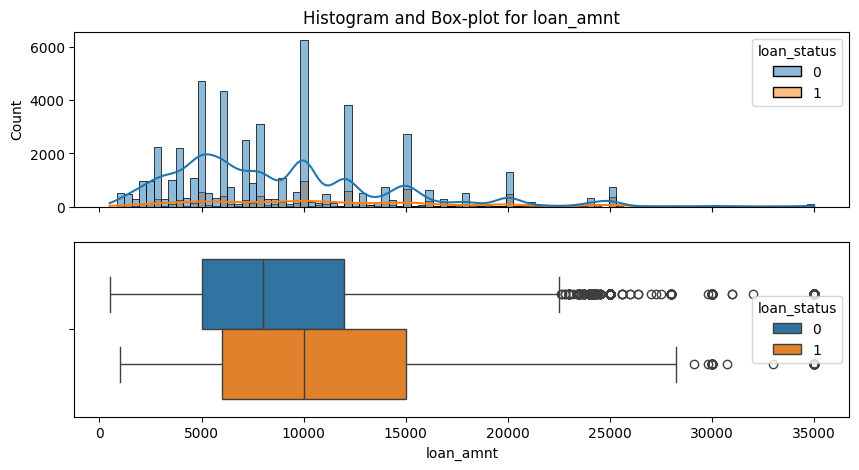

In [10]:
numerical_analysis("loan_amnt")

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50295.0,10.258767,2.827052,5.42,7.5100,10.39,12.42,22.11
1,8350.0,13.202305,3.018438,5.42,11.1125,13.79,15.58,23.22


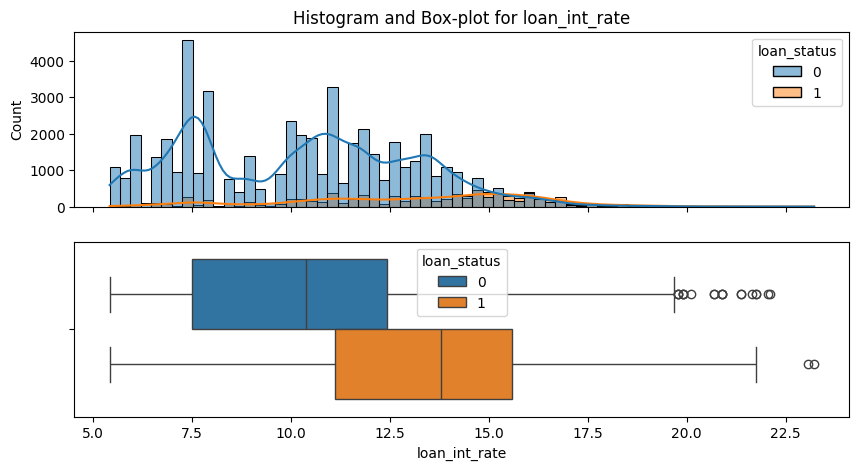

In [11]:
numerical_analysis("loan_int_rate")

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50295.0,0.145105,0.077867,0.00,0.08,0.13,0.20,0.63
1,8350.0,0.244363,0.118654,0.01,0.14,0.25,0.33,0.83


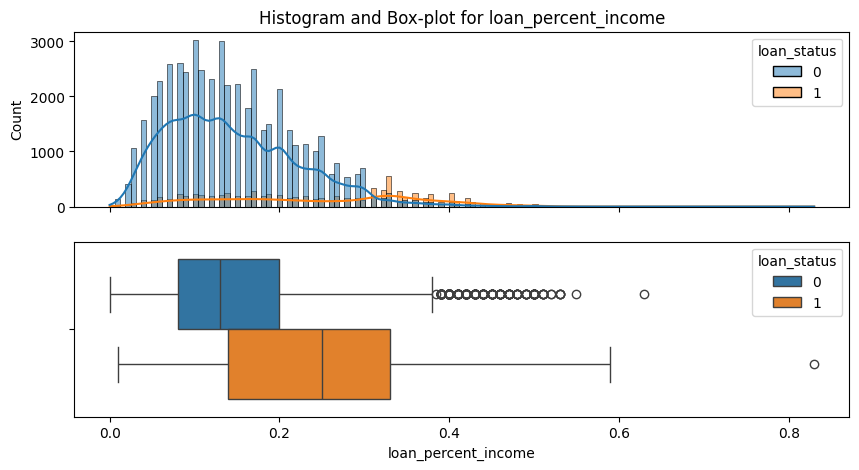

In [12]:
numerical_analysis("loan_percent_income")

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,50295.0,5.818531,4.001945,2.0,3.0,4.0,8.0,30.0
1,8350.0,5.783593,4.189715,2.0,3.0,4.0,8.0,30.0


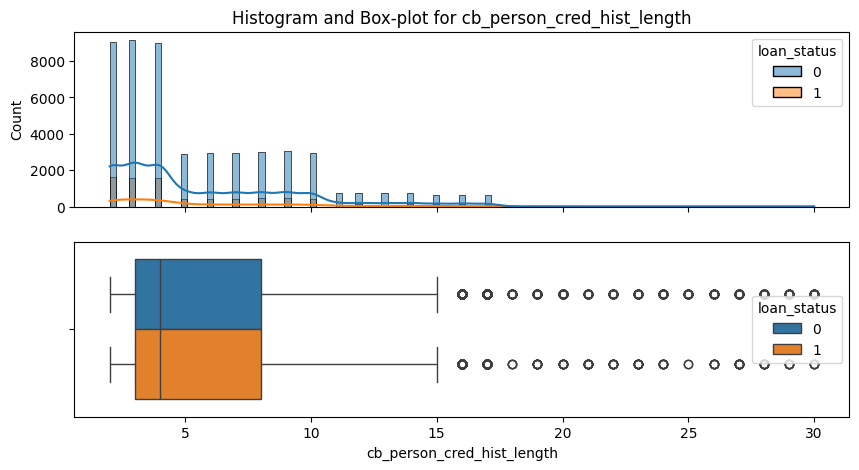

In [13]:
numerical_analysis("cb_person_cred_hist_length")

#### Correlation

In [14]:
def correlation_matrix(correlation_matrix, ax=None, vmin=-1, vmax=1):

    # Creates a triangular shaped mask based on the original matrix
    tri_mask = np.triu(np.ones_like(correlation_matrix))

    # Plot the triangular heat map
    sns.heatmap(
        data=correlation_matrix,
        mask=tri_mask,
        annot=True,
        cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
        ax=ax,
        vmin=vmin,
        vmax=vmax,
    )

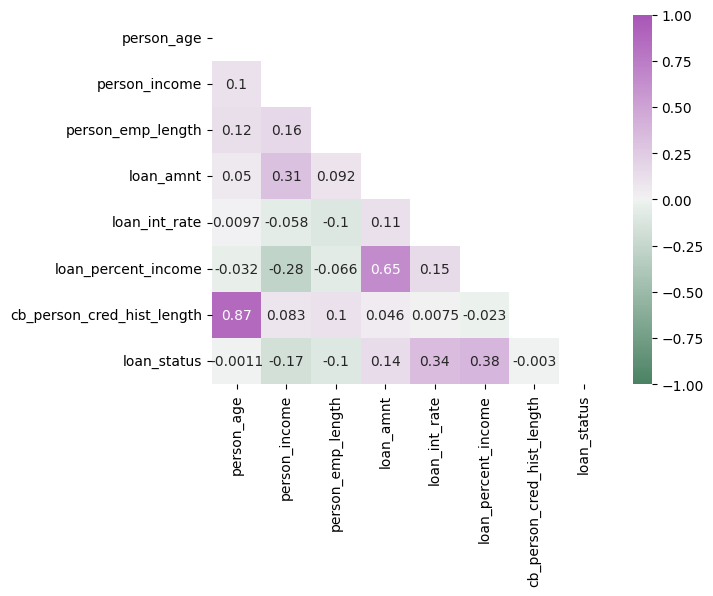

In [15]:
correlation_matrix(
    df[
        [
            "person_age",
            "person_income",
            "person_emp_length",
            "loan_amnt",
            "loan_int_rate",
            "loan_percent_income",
            "cb_person_cred_hist_length",
            "loan_status",
        ]
    ].corr()
)

#### Observations
- All numerical variables have outliers
- Some variables have strong correlations
    - loan_percent_income X loan_amnt
    - person_age X cb_person_cred_hist_length

### Categorical variables analysis

#### Significance association based on chi-square

In [27]:
def categorical_analysis(
    variable: str,
    significance: float = 0.05,
    primary_variable: str = "loan_status",
    figsize=(8, 7),
):

    # Crosstab comparing the variable with loan_status
    df_cross = pd.crosstab(df[primary_variable], df[variable])

    # Chi2 testing and result
    p_value = chi2_contingency(df_cross)[1]

    if p_value < significance:
        title = f"There is a significant association between customer {variable} and {primary_variable}, \nconsidering a chi2 significance of {significance * 100}% and a p-value of {p_value:.3e}"
    else:
        title = f"There is no significant association or dependence between customer {variable} and {primary_variable}, \nconsidering a chi2 significance of {significance * 100}% and a p-value of {p_value:.3e}"

    # Barplot with the number of customers based on loan status and the variable
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=variable, data=df, hue=primary_variable)
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height()}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="bottom",
            fontsize=12,
            color="black",
        )

    plt.suptitle(f"Amount of {primary_variable} per {variable}", fontsize=16)
    plt.title(title, fontsize=12, y=1)
    plt.show()

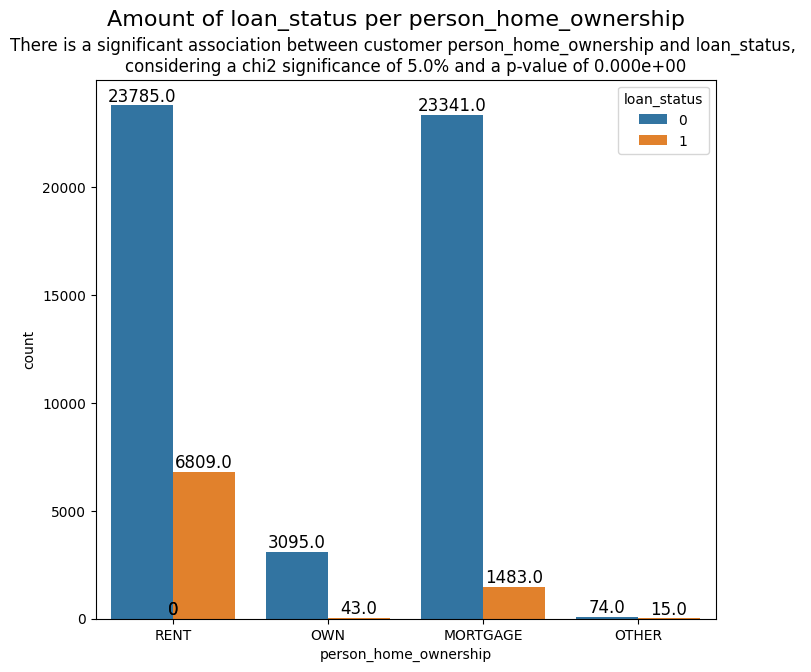

In [25]:
categorical_analysis("person_home_ownership")

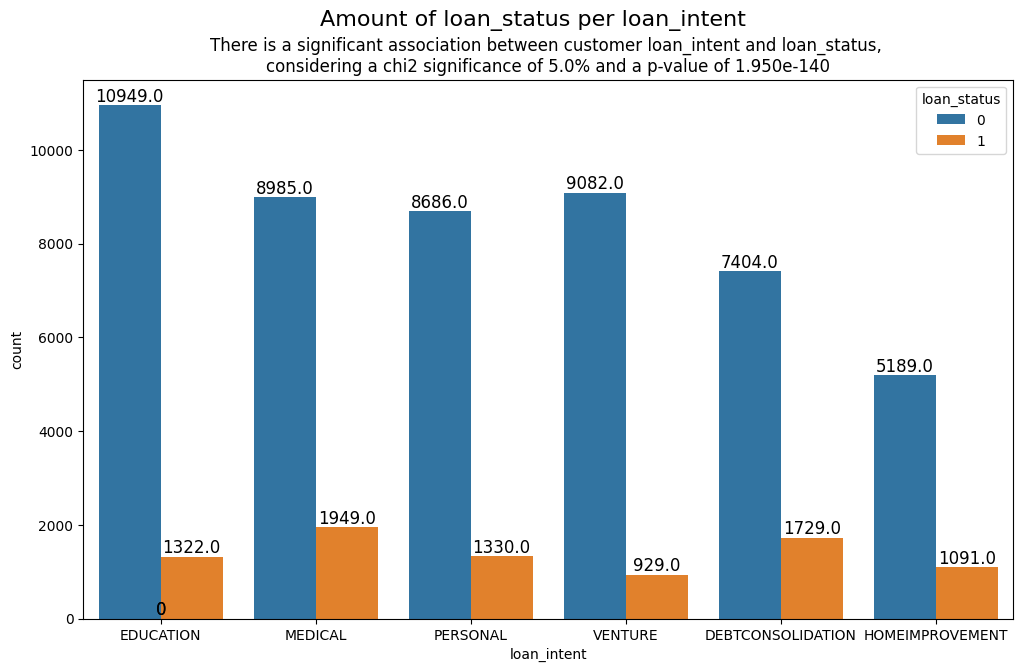

In [31]:
categorical_analysis("loan_intent", figsize=(12, 7))

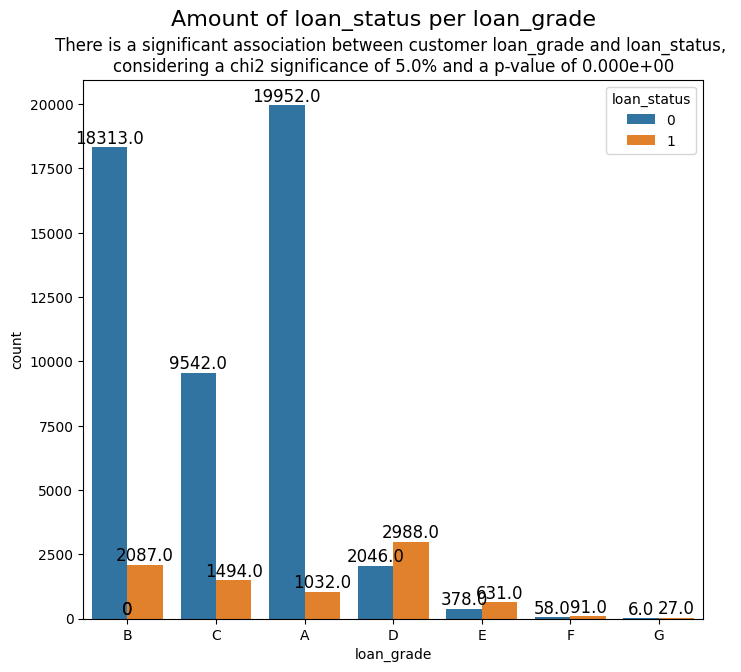

In [32]:
categorical_analysis("loan_grade")

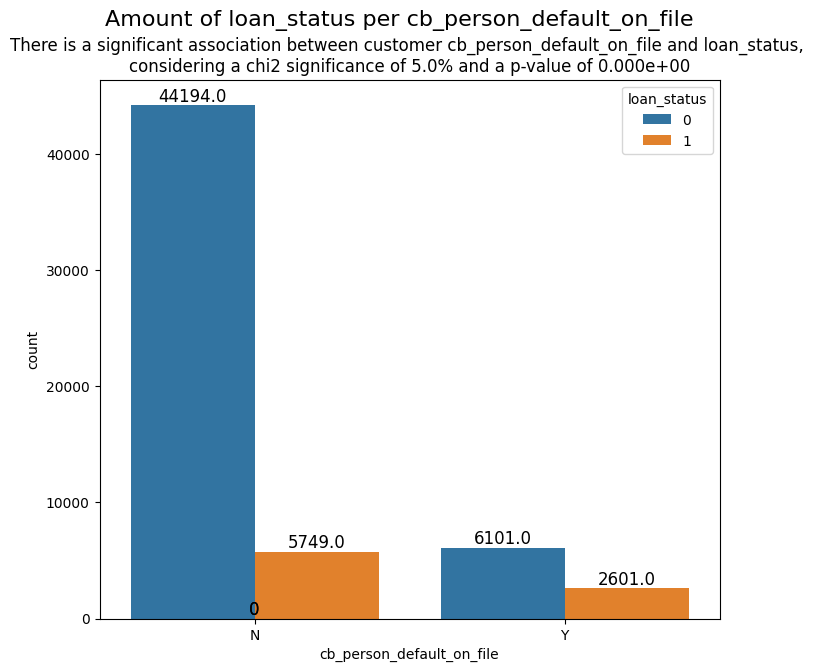

In [33]:
categorical_analysis("cb_person_default_on_file")

#### Observations
- All categorical variables appear to be effective in predicting loan status.
- The variables will need one-hot-encoding

## Model Selection